In [1]:
import pandas as pd
from pysyncon import Dataprep, Synth
from pysyncon.utils import PlaceboTest
import numpy as np
from statsmodels.formula.api import ols

In [2]:
#Загрузка данных
df = pd.read_excel( "C:\\Users\\mtaip\\Downloads\\Fixed investments.xlsx ")
df.head()

,year,CAPEX,Industry
0,2000,31.0991,Network
1,2001,45.0827,Network
2,2002,59.8975,Network
3,2003,104.6227,Network
4,2004,155.6929,Network


In [4]:
dataprep = Dataprep(
    foo=df,
    predictors=["CAPEX"],
    predictors_op="mean",
    time_predictors_prior=range(2000,2016),
   
    dependent="CAPEX",
    unit_variable="Industry",
    time_variable="year",
    treatment_identifier="Network",
    controls_identifier=[
         "Food", "retail","metallurgy","healthcare","real estate","agriculture","finance","paper","building","mining","science"
    ],
    time_optimize_ssr=range(2000, 2016),
)
print(dataprep)

Dataprep
Treated unit: Network
Dependent variable: CAPEX
Control units: Food, retail, metallurgy, healthcare, real estate, agriculture, finance, paper, building, mining, science
Time range in data: 2000 - 2023
Time range for loss minimization: range(2000, 2016)
Time range for predictors: range(2000, 2016)
Predictors: CAPEX



In [5]:

synth = Synth()
#Настройка синтетического контроля
synth.fit(dataprep=dataprep, optim_method="BFGS", optim_initial="ols")
#Полученные веса
synth.weights(threshold=0.01)

Food           0.107
retail         0.060
metallurgy     0.094
healthcare     0.107
real estate    0.048
agriculture    0.057
finance        0.125
paper          0.151
building       0.064
mining         0.048
science        0.139
Name: weights, dtype: float64

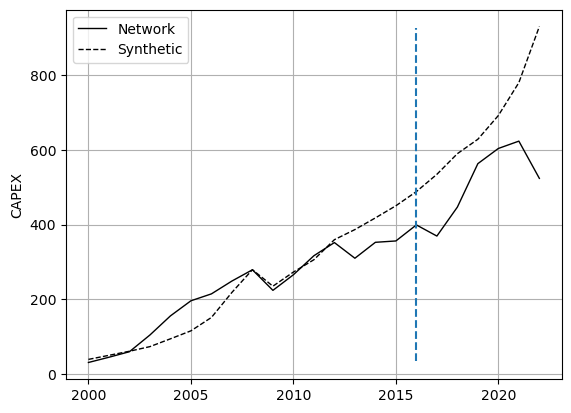

In [6]:
#Графики инвестиций в отрасль связи и синтетического контроля
synth.path_plot(time_period=range(2000, 2023), treatment_time=2016)

In [7]:
#плацебо-тест
placebo_test = PlaceboTest()
placebo_test.fit(
    dataprep=dataprep,
    scm=synth,
    scm_options={"optim_method":"BFGS", "optim_initial":"ols"   },
)

(1/11) Completed placebo test for real estate.
(2/11) Completed placebo test for healthcare.
(3/11) Completed placebo test for finance.
(4/11) Completed placebo test for retail.
(5/11) Completed placebo test for science.
(6/11) Completed placebo test for metallurgy.
(7/11) Completed placebo test for Food.
(8/11) Completed placebo test for building.
(9/11) Completed placebo test for mining.
(10/11) Completed placebo test for paper.
(11/11) Completed placebo test for agriculture.
Calculating treated unit gaps.
Done.


In [9]:
#Тест Фишера на отсутствие эффекта сетевого нейтралитета
placebo_test.pvalue(treatment_time=2016)

0.16666666666666666